Ask & answer questions
1. Are there more accidents in warmer or colder areas?
2. Which 5 city have the highest number of accidents?
3. Does New York show up in the data? If yes, why is the count lower if this the most populated city.
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
5. What time of the day are accidents most frequent in? - ANSWERED
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year (decreasing/increasing?)
9. When is accidents per unit of traffic the highest.

In [3]:
import pandas as pd
df=pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


Columns we will anaylize
1. city
2.start time
3.temperature
4.wheather condition
5.start lan , start long

In [4]:
df.shape #here we are dealing with the 7 million data sets

(7728394, 46)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [8]:
ss = df.isnull().sum().sort_values(ascending=False)

In [13]:
ss[ss>0]

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
dtype: int64

<Axes: >

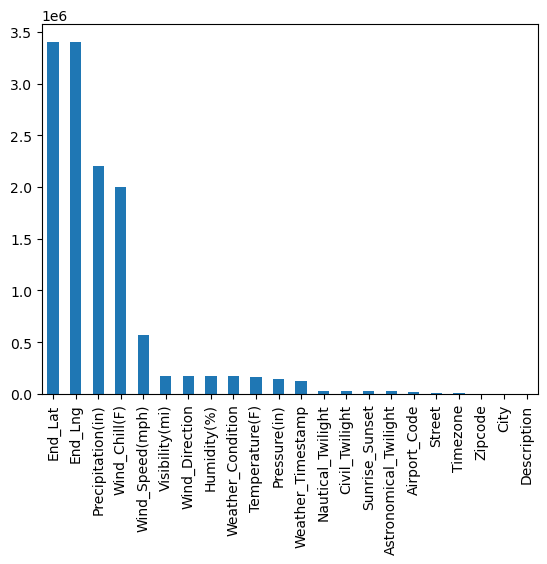

In [7]:
#the graph shows the no of null values in the each columns

ss[ss>0].plot(kind = "bar") #no of NAN present

# # Q-Which 5 city have the highest number of accidents?

In [8]:
df["City"].value_counts()[0:5] #the most no of top 5 accident happens in this city

Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Name: City, dtype: int64

In [9]:
df["City"].value_counts()

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

<Axes: >

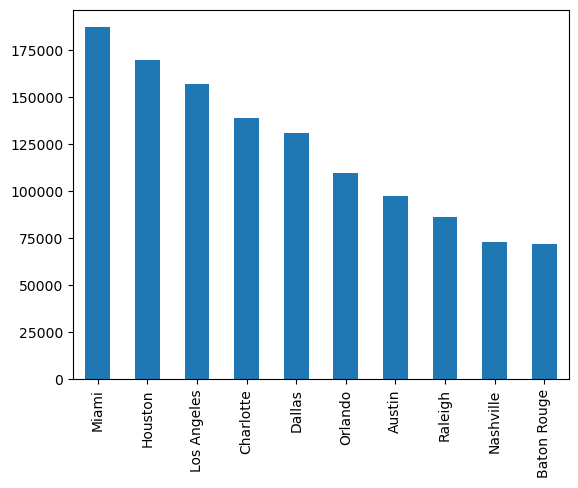

In [10]:
#the graph shows the no of accident happen in this city 
df["City"].value_counts()[0:10].plot(kind = "bar")

In [11]:
df.describe() #describe will tell all the stats info in the data 

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [15]:
max(df["Temperature(F)"])

207.0

In [13]:
min(df["Temperature(F)"])

-89.0

In [14]:
import numpy as np
np.mean(df["Temperature(F)"])

61.66328580941001

# # Are there more accidents in warmer or colder areas?

In [15]:
df["Temperature(F)"].value_counts() #more accident happen in 75-77 F that mean it is warm

 77.0     170991
 73.0     170898
 68.0     163767
 72.0     160498
 75.0     158448
           ...  
 1.6           1
-21.5          1
 127.0         1
 158.0         1
 132.6         1
Name: Temperature(F), Length: 860, dtype: int64

In [29]:
len(df["City"].unique())

13679

# # Is there is new york city

In [17]:
aa = df[df["City"]=="New York"]# yes the only new york we are looking coz in top 5 city accident new york was not present so we check wheather it exits or not
aa.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
194401,A-194408,Source2,2,2016-12-01 08:21:11,2016-12-01 08:50:48,40.770107,-73.957397,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
194415,A-194422,Source2,3,2016-12-01 08:49:35,2016-12-01 09:19:14,40.849579,-73.942314,NaN,NaN,1.13,...,False,False,False,False,False,False,Day,Day,Day,Day
194468,A-194475,Source2,2,2016-12-01 12:08:26,2016-12-01 12:37:55,40.748028,-73.968170,NaN,NaN,0.01,...,False,False,True,False,False,False,Day,Day,Day,Day
194533,A-194540,Source2,2,2016-12-02 05:19:11,2016-12-02 05:49:02,40.761723,-73.982803,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Night,Night
194551,A-194558,Source3,2,2016-12-02 07:09:04,2016-12-02 07:38:36,40.782818,-73.943871,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [18]:
aa.City

194401     New York
194415     New York
194468     New York
194533     New York
194551     New York
             ...   
7726396    New York
7726942    New York
7727478    New York
7727498    New York
7727997    New York
Name: City, Length: 21699, dtype: object

In [17]:
df["State"].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [20]:
len(df["State"].unique()) #there are 49 states present in the datasets


49

In [21]:
df["State"].value_counts()

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: State, dtype: int64

In [ ]:
city_accident  = df["City"].value_counts() #tells the frequency
city_less_1000 = city_accident[city_accident<=1000]
city_more_1000 = city_accident[city_accident>=1000]

In [20]:
city_less_1000

Zephyrhills                     1000
Berwyn                          1000
Bennettsville                   1000
Coos Bay                         998
Hobe Sound                       996
                                ... 
Benkelman                          1
Old Appleton                       1
Wildrose                           1
Mc Nabb                            1
American Fork-Pleasant Grove       1
Name: City, Length: 12463, dtype: int64

In [49]:
city_more_1000

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
                  ...  
Fairview           1002
Sedona             1001
Zephyrhills        1000
Berwyn             1000
Bennettsville      1000
Name: City, Length: 1218, dtype: int64

In [22]:
df["City"].value_counts()

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

In [47]:
city_accident

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

In [25]:
len(df["City"])

7728394

In [43]:
(12463/13678)*100 #itne percent 91.11 have less than 1000 accident

91.11712238631378

In [44]:
city_more_1000

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
                  ...  
Fairview           1002
Sedona             1001
Zephyrhills        1000
Berwyn             1000
Bennettsville      1000
Name: City, Length: 1218, dtype: int64

In [45]:
(1218/13678)*100 #8.9 percent of the city have more than 1000 accident

8.904810644831116

In [50]:
len(city_less_1000)

12463

In [51]:
len(city_more_1000)

1218

In [52]:
city_accident[city_accident==1] #there are 1023 citites where only 1 accident happens

Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1023, dtype: int64

lets explore start time columns

In [21]:
df["Start_Time"]

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [22]:
for i in df["Start_Time"][0:5]:
    print(i.split(" ")[0],i.split(" ")[1])

2016-02-08 05:46:00
2016-02-08 06:07:59
2016-02-08 06:49:27
2016-02-08 07:23:34
2016-02-08 07:39:07


In [29]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])

In [30]:
df["Start_Time"] 

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

In [31]:
df["Start_Time"][0]

Timestamp('2016-02-08 05:46:00')

In [32]:
df["Start_Time"].dt.hour #we will get the hours from the time

0           5
1           6
2           6
3           7
4           7
           ..
7728389    18
7728390    19
7728391    19
7728392    19
7728393    18
Name: Start_Time, Length: 7728394, dtype: int64

summary and some conclusion

# # What time of the day are accidents most frequent in? - ANSWERED****

<Axes: xlabel='Start_Time', ylabel='Count'>

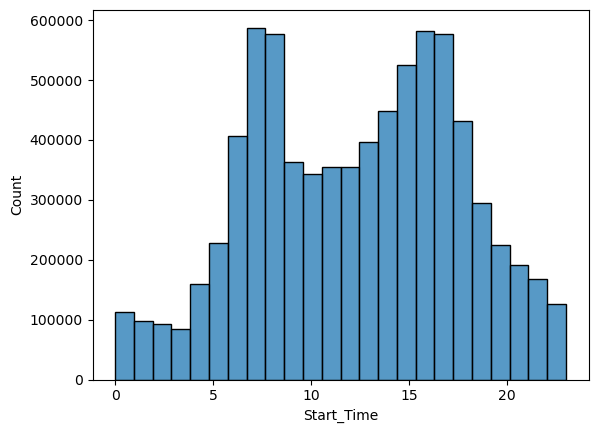

In [34]:
import seaborn as sns
sns.histplot(data = df["Start_Time"].dt.hour,bins = 24,kde = False)
#conclude that 7 am to 8 am accident happens then 3 pm to 6 pm happens most of the accident happens

In [35]:
df["Start_Time"].dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
7728389    2019
7728390    2019
7728391    2019
7728392    2019
7728393    2019
Name: Start_Time, Length: 7728394, dtype: int64

In [36]:
df["Start_Time"].dt.year.unique()

array([2016, 2017, 2022, 2021, 2020, 2019, 2018, 2023])

# # What is the trend of accidents year over year (decreasing/increasing?)

In [37]:
df["Start_Time"].dt.year.value_counts()
#the trend of the accident are going increasing as the years goes up

2022    1762452
2021    1563753
2020    1178913
2019     954303
2018     893426
2017     718093
2016     410821
2023     246633
Name: Start_Time, dtype: int64

<Axes: >

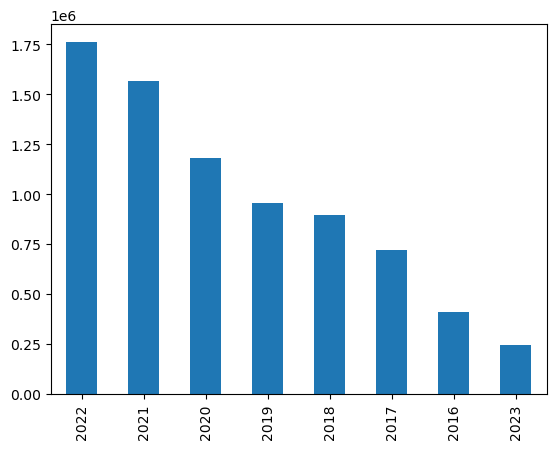

In [38]:
df["Start_Time"].dt.year.value_counts().plot(kind = "bar")

In [39]:
df["Start_Time"].dt.month.value_counts()

12    847343
11    760165
1     751946
10    675130
2     658984
9     651381
8     599666
4     587300
6     571373
5     558176
3     554595
7     512335
Name: Start_Time, dtype: int64

# # Which months have the most accidents

<Axes: >

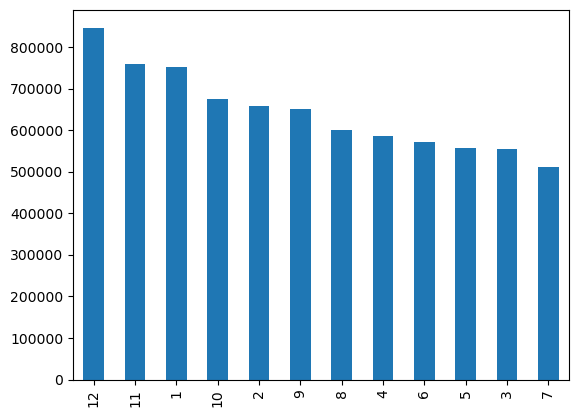

In [40]:
df["Start_Time"].dt.month.value_counts().plot(kind = "bar")
#in december novmember and january the most accident occurs

In [43]:
df["Start_Time"].dt.date.value_counts()
#the most accident happen on a date 23-12-2022

2022-12-23    10067
2022-12-22     9552
2022-12-15     9256
2023-01-25     9250
2021-02-11     9087
              ...  
2022-10-29        1
2023-01-08        1
2022-03-30        1
2016-06-15        1
2023-03-15        1
Name: Start_Time, Length: 2572, dtype: int64

In [44]:
df["Start_Time"].dt.day.value_counts()
#on 4th week of the month most accident happens and the dates were 22 and 23

22    277077
23    276906
12    266192
14    264938
16    264611
21    264017
13    263738
15    263674
19    263066
18    262996
11    261781
20    261460
17    257276
8     253358
24    250939
1     248767
6     248515
27    248138
9     247890
7     247747
5     247612
10    247178
2     244995
3     242845
4     242592
28    240474
26    237524
25    232740
30    231731
29    225626
31    141991
Name: Start_Time, dtype: int64

# # Which days of the week have the most accidents?

<Axes: >

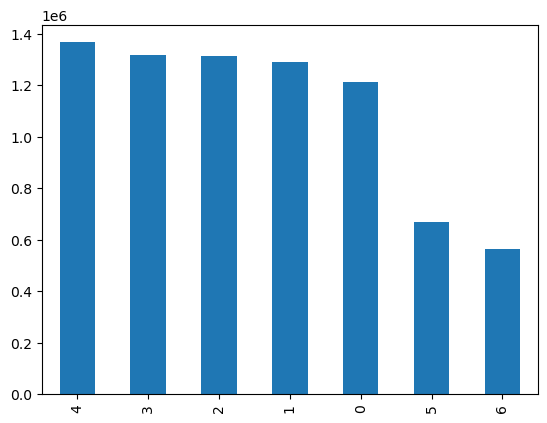

In [45]:
df["Start_Time"].dt.dayofweek.value_counts().plot(kind = "bar")
#monday tuesday wed,thursday,friday have most accident and friday have the highest no of accident

In [46]:
all_days = df["Start_Time"].dt.dayofweek.value_counts()
all_days

4    1366499
3    1316229
2    1312389
1    1290929
0    1210921
5     668683
6     562744
Name: Start_Time, dtype: int64

In [47]:
df1=df[df["Start_Time"].dt.dayofweek ==6] #this is the data of the sunday
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
135,A-136,Source2,3,2016-02-14 10:13:00,2016-02-14 23:59:00,39.981709,-82.984360,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
136,A-137,Source2,3,2016-02-14 10:49:23,2016-02-14 11:19:23,39.953022,-82.998894,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
137,A-138,Source2,3,2016-02-14 10:41:57,2016-02-14 11:11:57,39.973812,-82.983162,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
138,A-139,Source2,3,2016-02-14 18:15:23,2016-02-14 19:30:00,39.978306,-82.852554,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
139,A-140,Source2,3,2016-02-14 19:17:01,2016-02-14 20:30:00,39.917412,-83.014236,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day


<Axes: xlabel='Start_Time', ylabel='Count'>

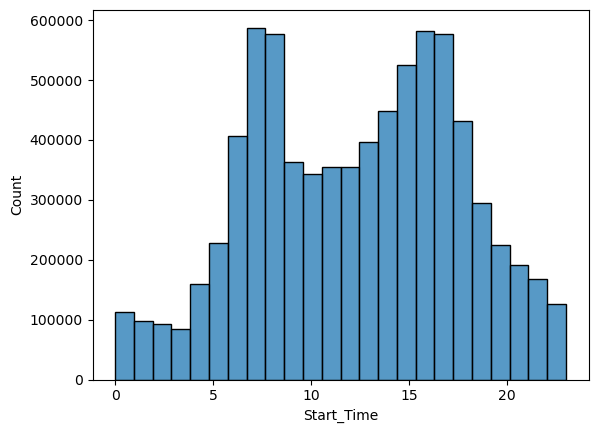

In [48]:
import seaborn as sns
sns.histplot(data = df["Start_Time"].dt.hour,bins = 24,kde = False)

<Axes: xlabel='Start_Time', ylabel='Count'>

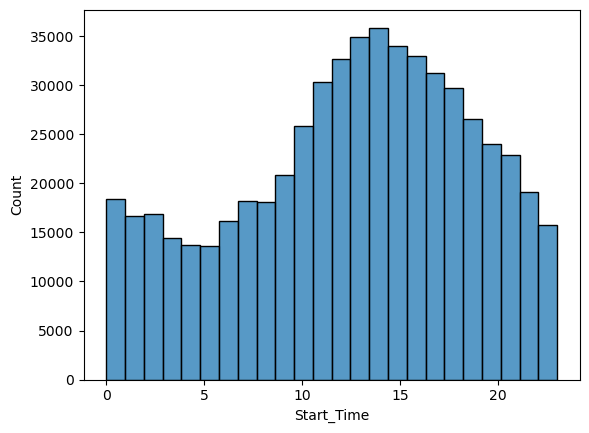

In [49]:
import seaborn as sns
sns.histplot(df1["Start_Time"].dt.hour,bins = 24,kde = False)
#in the sunday most people have the accident 12 pm to 6 pm

In [50]:
df2=df[df["Start_Time"].dt.dayofweek==4] #this is the data of the friday
df2.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
122,A-123,Source2,2,2016-02-12 16:16:51,2016-02-12 17:01:51,39.749786,-84.199493,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day
123,A-124,Source2,2,2016-02-12 16:42:52,2016-02-12 17:27:52,39.780331,-84.195076,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
124,A-125,Source2,3,2016-02-12 17:47:41,2016-02-12 18:52:13,40.109928,-82.978203,NaN,NaN,1.67,...,False,False,False,False,False,False,Day,Day,Day,Day
125,A-126,Source2,3,2016-02-12 20:04:00,2016-02-12 23:59:00,40.111950,-83.016663,NaN,NaN,0.94,...,False,False,False,False,False,False,Night,Night,Night,Night
126,A-127,Source2,3,2016-02-12 20:12:00,2016-02-12 23:59:00,40.112156,-83.035072,NaN,NaN,0.94,...,False,False,False,False,False,False,Night,Night,Night,Night


<Axes: xlabel='Start_Time', ylabel='Count'>

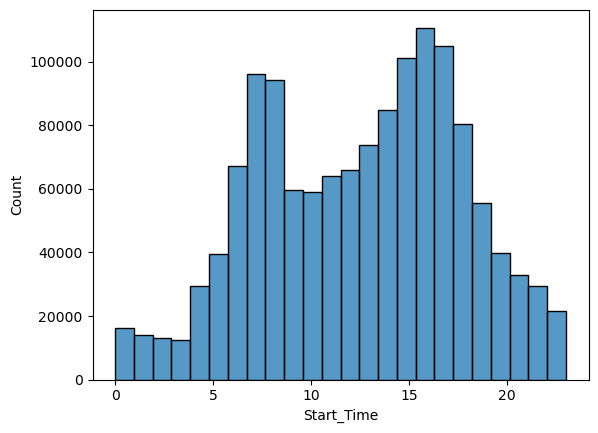

In [52]:
import seaborn as sns
sns.histplot(data = df2["Start_Time"].dt.hour,bins = 24,kde = False)
#in weekdays accident happens in the 7am to 9am as well but on sunday only in the afternoon

In [53]:
df3_2021=df[df["Start_Time"].dt.year == 2021]
df3_2021.head()
#this is the data of only 2021

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
746584,A-756281,Source2,3,2021-12-31 02:22:33,2022-01-03 04:05:00,39.916199,-105.091141,NaN,NaN,0.36,...,False,False,False,False,False,False,Night,Night,Night,Night
746585,A-756282,Source2,3,2021-12-31 02:22:33,2022-01-03 04:43:00,39.917252,-105.094147,NaN,NaN,1.96,...,False,False,False,False,False,False,Night,Night,Night,Night
746586,A-756283,Source2,3,2021-12-31 02:22:33,2022-01-03 04:41:00,39.930950,-105.120163,NaN,NaN,1.75,...,False,False,False,False,False,False,Night,Night,Night,Night
746587,A-756284,Source2,3,2021-12-31 02:22:33,2022-01-03 04:40:00,39.930950,-105.120163,NaN,NaN,1.75,...,False,False,False,False,False,False,Night,Night,Night,Night
746588,A-756285,Source2,3,2021-12-31 02:22:33,2022-01-03 04:12:00,39.933029,-105.123978,NaN,NaN,0.39,...,False,False,False,False,True,False,Night,Night,Night,Night


In [ ]:
sns.histplot(data= df3_2021["Start_Time"].dt.month,bins = 12,kde = False)
#nov and dec me jyda hue h 2021 mw bhi

In [ ]:
# we are checking every source1,2,3 and what is the diffrence obserb in accident in the month
#and we found the diffrence 

In [ ]:
df3_2021.head()

In [ ]:
df3_2021.columns

In [ ]:
source2 = df3_2021[df3_2021["Source"] == "Source2"]

In [ ]:
source1 = df3_2021[df3_2021["Source"] == "Source1"]

In [ ]:
source3 = df3_2021[df3_2021["Source"] == "Source3"]

In [ ]:
sns.histplot(source1["Start_Time"].dt.month,bins = 12,kde = False)

In [ ]:
sns.histplot(source2["Start_Time"].dt.month,bins = 12,kde = False)

In [ ]:
sns.histplot(source3["Start_Time"].dt.month,bins = 12,kde = False)

Now we will work on Start lat and start long

In [ ]:
df.head()

In [ ]:
df["Start_Lat"]

In [ ]:
df["Start_Lng"]

In [ ]:
percent = 0.01  # 1 percent
df_10 = df.sample(frac=percent)

In [ ]:
df_10.shape

In [ ]:
sns.scatterplot(x = df_10.Start_Lng,y = df_10.Start_Lat)
#in the dense area most of the accident occurs

make 

In [ ]:
from folium.plugins import HeatMap

In [ ]:
lst_a = []

for i in df_10["Start_Lat"]:
    tpl_a = ()
    tpl_a = tpl_a + (i,)
    for j in df_10["Start_Lng"]:
            tpl_a = tpl_a + (j,)
            lst_a.append(tpl_a)
            break
            
          
            
    

In [ ]:
len(lst_a)

In [ ]:
lst_a[0]

In [ ]:
for i in (lst_a):
    usa_map = folium.Map(location=i, zoom_start=12)
    heatmap_data = [i]
    heatmap = HeatMap(heatmap_data)
    heatmap.add_to(usa_map)
    
usa_map    